<a href="https://colab.research.google.com/github/Ashif-khan033/coronavirus_tweets_sentiment_analysis/blob/main/coronavirus_tweets_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Sentiment Analysis : Predicting sentiment of COVID-19 tweets (Classification)
##### **Contribution**    - Individual/Team
##### **Team Member 1 -*Mohd Ashif Khan*
##### **Team Member 2 -*Mayank Belwal*
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
# Load Dataset
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 

#importing Standard scaler
from sklearn.preprocessing import StandardScaler

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# importing libary for VIF calcualtions
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Importing stats library for hypothesis testing
import scipy.stats
from scipy.stats import chi2

In [4]:
# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [5]:
# Sklearn Libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

### Dataset Loading

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [7]:
# Dataset First Look
tweet = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone_Project_3/Coronavirus Tweets.csv",encoding='ISO-8859-1')

# tweet = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone projects/Capstone Project_3_Supervised_ML_Class/Coronavirus Tweets.csv",encoding='ISO-8859-1')

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
tweet.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [9]:
tweet.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


### Dataset Information

In [10]:
# Dataset Info
num_of_rows = tweet.shape[0]
print(f"Total no. of rows: {num_of_rows}")

num_of_columns = tweet.shape[1]
print(f"Total no. of columns: {num_of_columns}")

Total no. of rows: 41157
Total no. of columns: 6


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
print("Duplicate entry in data:",len(tweet[tweet.duplicated()])) 

Duplicate entry in data: 0


In [12]:
print("Total Rows and Columns in DataFrame is :",tweet.shape,"\n") 

Total Rows and Columns in DataFrame is : (41157, 6) 



In [13]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
tweet.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [15]:
# Visualizing the missing values
import missingno as msno

UserName          0.00
ScreenName        0.00
Location         20.87
TweetAt           0.00
OriginalTweet     0.00
Sentiment         0.00
dtype: float64


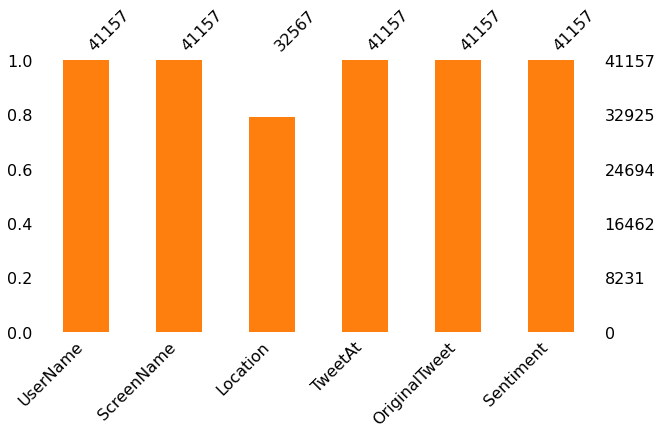

In [16]:
msno.bar(tweet,figsize=(10,5), color="tab:orange");
print(np.round(tweet.isnull().mean(), 4)*100)

### What did you know about your dataset?

Answer Here

In [17]:
def tweetinfo():
    temp_ps = pd.DataFrame(index=tweet.columns)
    temp_ps['DataType'] = tweet.dtypes
    temp_ps["Non-null_Values"] = tweet.count()
    temp_ps['Unique_Values'] = tweet.nunique()
    temp_ps['NaN_Values'] = tweet.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(tweet))*100 
    return temp_ps

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
# Shape of the data.
print("Total Rows and Columns in DataFrame is :",tweet.shape,"\n") 
# Custom Function
tweetinfo()

Total Rows and Columns in DataFrame is : (41157, 6) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
UserName,int64,41157,41157,0,0.000000
ScreenName,int64,41157,41157,0,0.000000
Location,object,32567,12220,8590,20.871298
TweetAt,object,41157,30,0,0.000000
OriginalTweet,object,41157,41157,0,0.000000
Sentiment,object,41157,5,0,0.000000


In [19]:
# # Dataset Describe/statistics info
tweet.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UserName,41157.0,NaN,NaN,NaN,24377.0,11881.146851,3799.0,14088.0,24377.0,34666.0,44955.0
ScreenName,41157.0,NaN,NaN,NaN,69329.0,11881.146851,48751.0,59040.0,69329.0,79618.0,89907.0
Location,32567,12220,London,540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TweetAt,41157,30,20-03-2020,3448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OriginalTweet,41157,41157,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sentiment,41157,5,Positive,11422,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# dataset contain Text data so its better to convert it into string 
tweet["OriginalTweet"] = tweet["OriginalTweet"].astype(str)
tweet["Sentiment"] = tweet["Sentiment"].astype(str)

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [22]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64


<AxesSubplot:ylabel='Sentiment'>

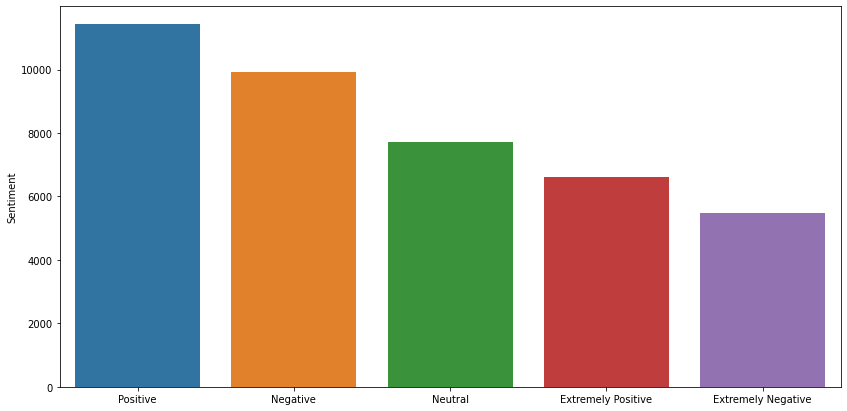

In [23]:
# Chart - 1 visualization code
x = tweet["Sentiment"].value_counts()
print(x)
plt.figure(figsize=(14,7))
sns.barplot(x.index,x)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

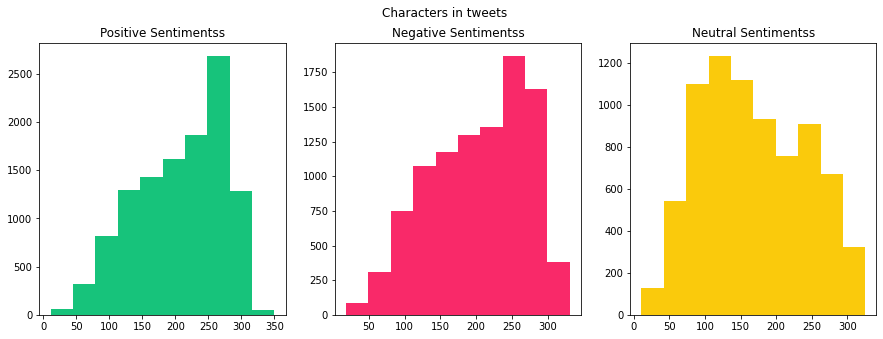

In [24]:
# Chart - 2 visualization code
# Histogram [Number of characters in tweets]
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

# Histogram for Positive Sentiments
tweet_len= tweet[tweet['Sentiment'] == "Positive"]["OriginalTweet"].str.len()
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentimentss')

# Histogram for Negative Sentiments
tweet_len=tweet[tweet['Sentiment']=="Negative"]['OriginalTweet'].str.len()
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentimentss')

# Histogram for Neutral Sentiments
tweet_len=tweet[tweet['Sentiment']=="Neutral"]['OriginalTweet'].str.len()
ax3.hist(tweet_len,color='#FACA0C')
ax3.set_title('Neutral Sentimentss')

fig.suptitle('Characters in tweets')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [25]:
# Dwonloading stopwords from nltk library 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

# Function to create a corpus 
def create_corpus(target):
    corpus=[] 
    for x in tweet[tweet['Sentiment']==target ]['OriginalTweet'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


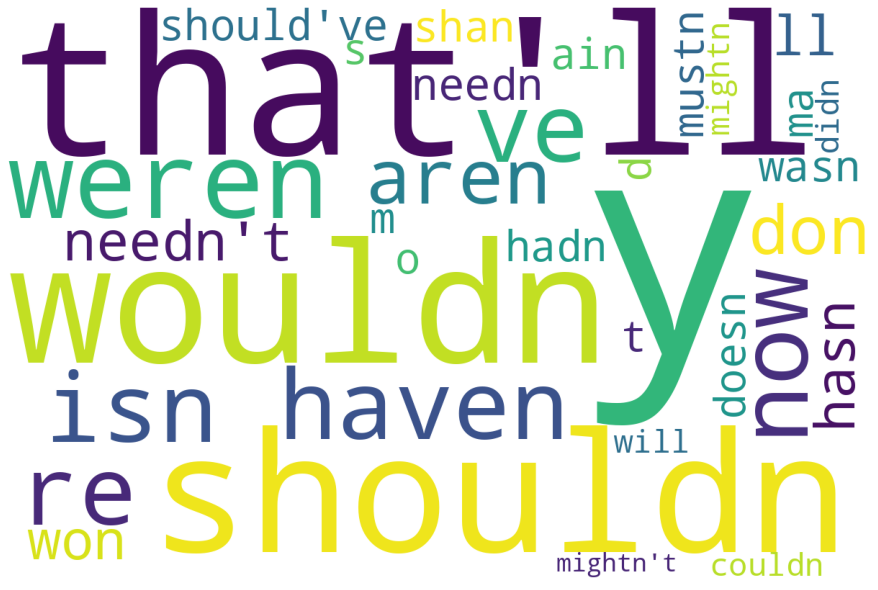

In [26]:
# Cloudword for Stopwords present in dataset

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
comment_words = '' 
stopwords= set(STOPWORDS)

for val in stop:     
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split()   
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()  
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='white',
                stopwords = stopwords, 
                min_font_size = 6).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 8), facecolor = "white") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

<BarContainer object of 10 artists>

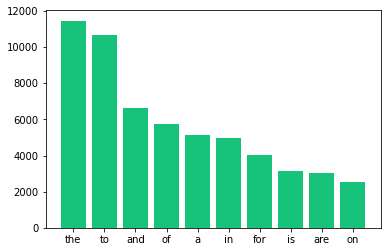

In [27]:
# Stopwords in Positive sentiments
corpus=create_corpus("Positive")
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1     
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#17C37B')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [28]:
# getting top 10 locations
top10_location = tweet['Location'].value_counts().sort_values(ascending = False)[:10]
top10_location

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

<AxesSubplot:title={'center':'Graphical Representation of Top 10 Location'}, xlabel='Location', ylabel='count'>

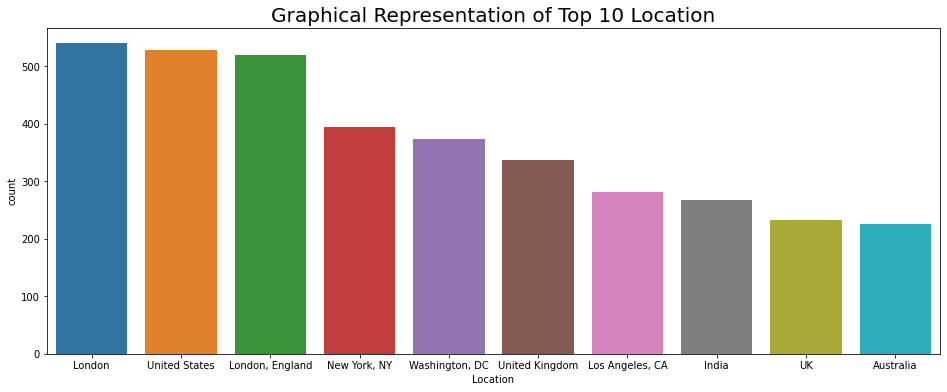

In [29]:
# Chart - 4 visualization code

# plotting top 10 location in graaph
plt.figure(figsize=(16,6))
plt.title('Graphical Representation of Top 10 Location', fontsize = 20)
sns.countplot(data = tweet[tweet['Location'].isin(top10_location.index)], x='Location', order=top10_location.index)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

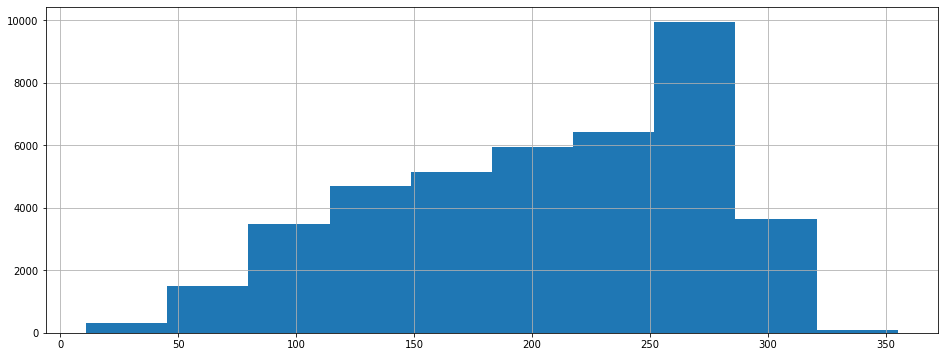

In [30]:
# Chart - 5 visualization code

# plotting "OriginalTweet" column
plt.figure(figsize=(16,6))
plt.grid()
plt.hist(tweet['OriginalTweet'].str.len())
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

<BarContainer object of 23 artists>

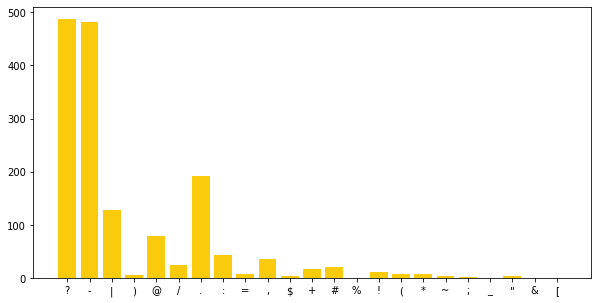

In [31]:
# Chart - 6 visualization code
# Punctuations in Neutral sentiments
plt.figure(figsize=(10,5))
corpus=create_corpus("Neutral")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

        
x,y=zip(*dic.items())
plt.bar(x,y,color='#FACA0C')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<BarContainer object of 23 artists>

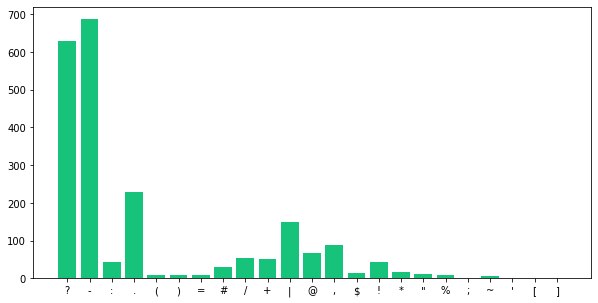

In [32]:
# Chart - 7 visualization code

# Punctuations in Positive sentiments
plt.figure(figsize=(10,5))
corpus=create_corpus("Positive")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='#17C37B')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<BarContainer object of 23 artists>

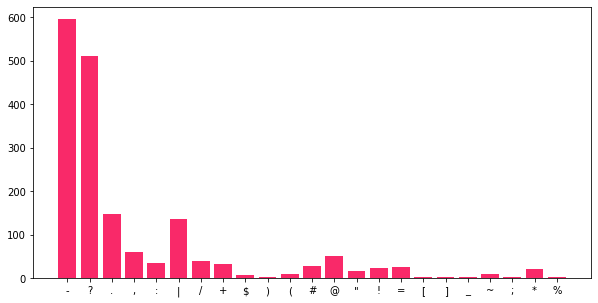

In [33]:
# Chart - 8 visualization code
# Punctuations in Negative sentiments
plt.figure(figsize=(10,5))
corpus=create_corpus("Negative")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
                
x,y=zip(*dic.items())
plt.bar(x,y, color='#F92969')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

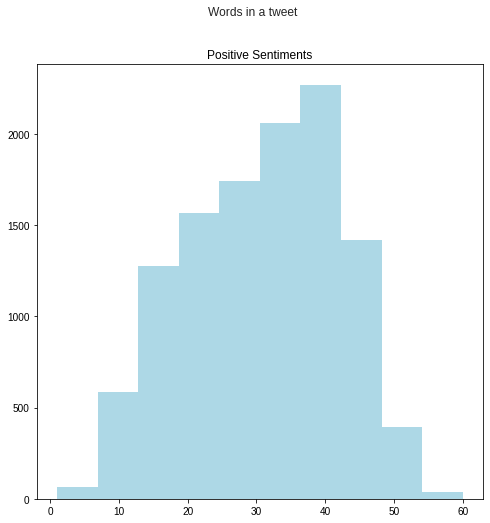

In [34]:
# Chart - 10 visualization code
# #Number of words in a tweet
# Histogram for Positive Sentiments

def words_tweet (sentiments,colour):


 fig,ax2=plt.subplots(figsize=(8,8))
 plt.style.use('seaborn')

# Histogram for Sentiments
 tweet_words=tweet[tweet['Sentiment']==sentiments]['OriginalTweet'].str.split().map(lambda x: len(x))
 ax2.hist(tweet_words,color=f"{colour}")
 ax2.set_title (f"{sentiments} Sentiments")

 fig.suptitle('Words in a tweet')
 plt.show()

words_tweet ("Positive","lightblue")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

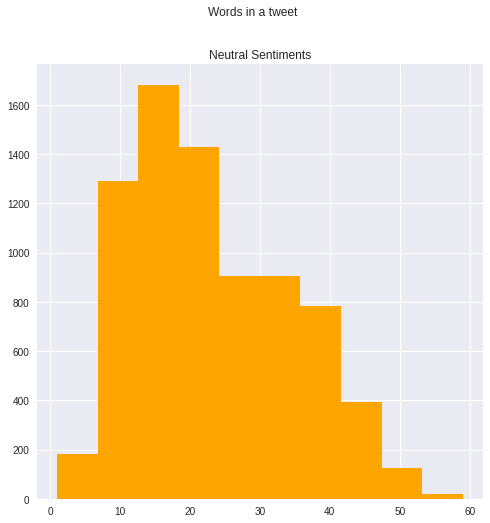

In [35]:
# Histogram for Neutral Sentiments
words_tweet ("Neutral","orange")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

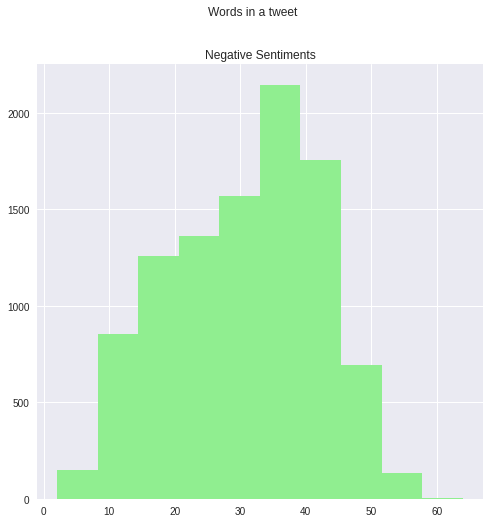

In [36]:
# Chart - 11 visualization code
# Histogram for Negative Sentiments
words_tweet ("Negative","lightGreen")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

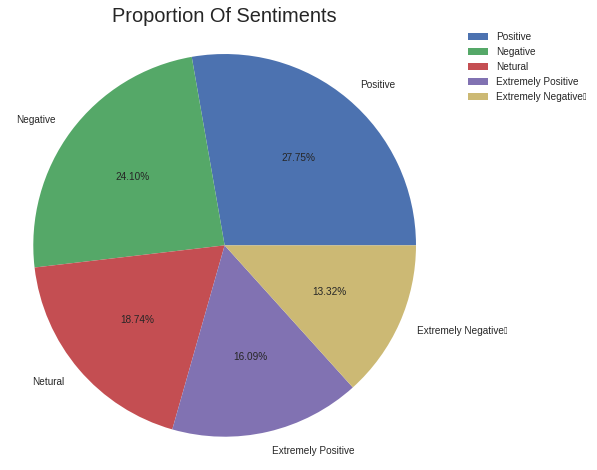

In [38]:
# Chart - 12 visualization code
# Plotting the piechart for Sentiments distribution
tweet = tweet['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural','Extremely Positive','Extremely Negative	']
plt.figure(figsize=(10,8))
plt.pie(x=tweet,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
tweet.dropna(inplace=True)
tweet.isnull().sum()

#reseting index
tweet = tweet.reset_index(drop=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing
tweet['OriginalTweet']

In [ ]:
# Convert text to lower case
tweet['OriginalTweet'] = tweet['OriginalTweet'].str.lower()
tweet['OriginalTweet']

#### 3. Removing Punctuations

In [ ]:
# Function for removing punctuuations
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
tweet['OriginalTweet'][0]

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
tweet['OriginalTweet'][0]

In [ ]:
# Remove URLs & Remove words and digits contain digits
tweet['OriginalTweet'] = tweet['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)

In [ ]:
# Applying Function
tweet['clean_tweet'] = tweet['OriginalTweet'].apply(remove_punctuations)

In [ ]:
tweet['clean_tweet']

In [ ]:
tweet['clean_tweet'] = tweet['clean_tweet'].str.replace("[^a-zA-Z#//]"," ")
tweet.head()

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
tweet['clean_tweet'] = tweet['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
tweet['OriginalTweet'][10]

In [ ]:
tweet.head(10)

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
# create new variable tokenization tweet 
tokenization_tweet = tweet['clean_tweet'].apply(lambda x: x.split())

In [ ]:
tweet.head(2)

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenization_tweet = tokenization_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenization_tweet

In [ ]:
# join tokens into one sentence
for i in range(len(tokenization_tweet)):
  tokenization_tweet[i] = ' '.join(tokenization_tweet[i])

In [ ]:
tweet['clean_tweet']  = tokenization_tweet

In [ ]:
tweet['clean_tweet']

In [ ]:
#function to show wordcloud for a sentiment
def word_cloudim(sentiments):
  normal_words = ' '.join([text for text in tweet['clean_tweet'][tweet['Sentiment'] == sentiments]])

  wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
  plt.figure(figsize=(10, 7))
  plt.title(f'Word cloud for Sentiment= {sentiments}')
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()

  #Capturing unique sentiments for tweet dataframe
Sentiments_list=list(tweet.Sentiment.unique())
Sentiments_list

#printing wordcloud for each sentiment
for x in Sentiments_list:
  word_cloudim(x)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
new_df=tweet[["Sentiment","clean_tweet"]].copy()
new_df

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
## defining Independent variable
X = tweet.OriginalTweet

## defining dependent variable
y = tweet.Sentiment


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

####We will be using tf-idf method for vectorising the text.

####**LOGISTIC REGRESSION**

In [ ]:
# ML Model - 1 Implementation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
# LR = LogisticRegression(solver='lbfgs', max_iter = 10000)

# parameters = {'C': [100, 1.0, 0.01]}
# Grid_log = GridSearchCV(LR,parameters, scoring='accuracy')
# # Fit the Algorithm

from sklearn.pipeline import Pipeline

# model = Pipeline([('vectorizer',tvec),('classifier',Grid_log)])
# model.fit(X_train, y_train)

# # Predict on the model

# y_pred_LR = model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_nb = MultinomialNB()

model2 = Pipeline([('vectorizer',tvec),('classifier',naiveByes_nb)])
model2.fit(X_train, y_train)

y_pred_NB = model2.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print('Accuracy :' ,accuracy_score(y_pred_NB,y_test))
print(classification_report(y_pred_NB,y_test))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

from sklearn.svm import SVC

svc = SVC()
model3 = Pipeline([('vectorizer',tvec),('classifier',svc)])

# Fit the Algorithm
model3.fit(X_train,y_train)

# Predict on the model
y_pred_svc = model3.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

### ML Model - 4

In [ ]:
# ML Model - 4 Implementation

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

parameters = {'n_estimators':[100], 'max_depth': [17,19,20], 'min_samples_leaf': [1, 2]}
Grid_RF = GridSearchCV(rf,parameters, scoring='accuracy')

In [ ]:
model4 = Pipeline([('vectorizer',tvec),('classifier',Grid_RF)])
model4.fit(X_train, y_train)

In [ ]:
y_pred_rf = model4.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print('Accuracy :' ,accuracy_score(y_pred_NB,y_test))
print(classification_report(y_pred_rf,y_test))

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***